# SciPy

Heavily depends on the following libraries:
1. matplotlib
2. numpy


"SciPy is organized into subpackages covering different scientific computing domains."

**Subpackages**
1. cluster: Clustering algorithms
2. constants: Physical and mathematical constants
3. fftpack: Fast Fourier Transform routines
4. integrate: Integration and ordinary differential equation solvers
5. interpolate: Interpolation and smoothing splines
6. io: Input and Output
7. linalg: Linear algebra
8. ndimage: N-dimensional image processing
9. odr: Orthogonal distance regression
10. optimize: Optimization and root-finding routines
11. signal: Signal processing
12. sparse: Sparse matrices and associated routines
13. spatial: Spatial data structures and algorithms
14. special: Special functions
15. stats: Statistical distributions and functions

Sources:

https://docs.scipy.org/doc/scipy/reference/

https://docs.scipy.org/doc/

https://docs.scipy.org/doc/scipy/reference/tutorial/general.html

https://scipy-lectures.org/intro/scipy.html

---
## Importance of polynomials in science

They are prevalent in all fields - ranging from physics to economics. In the real world we can almost never evaluate functions exactly (e.g. too complicated), instead we evaluate functions using approximations formed out of polynomials (e.g. Taylor series expansions).

**Examples**:
- chemistry: modeling potential energy surfaces
- astronomy: object (stars, planets, astroids) trajectories, velocities, interactions 
- economics: forcast trends
- meteorology: model weather patterns
- engineering: rollar coaster design
- virology: prediction contagons
- statistics: regressions and interpolation

## Example of simple polynomials in Numpy

#### A one-dimensional polynomial

https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

Let's start small with some background numpy and polynomial concepts, and slowly build up.

- Create a one dimensional polynomials using a function
    - using different coefficient(s)
    - evaluate the resulting function using a variable (i.e. x) value of 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def my_poly1d(coeff=None):
    ## create: np.poly1d(polynomial)
    ## evaluate: polynomial(2)
    
    polynomial = np.poly1d(coeff)
    print('Polynomial: \n{0}'.format(polynomial))
    print('Evaluate when x=2: {0}'.format(polynomial(2)))

#### One coefficient: [M] --> $M$

In [3]:
coefficients = [2]
my_poly1d(coefficients)

Polynomial: 
 
2
Evaluate when x=2: 2


#### Two coefficients: [M, N] --> $Mx + N$
- Note how the M shifts to the x

In [4]:
coefficients = [1, 2]
my_poly1d(coefficients)

Polynomial: 
 
1 x + 2
Evaluate when x=2: 4


#### Including a negative coefficients: [1, -1]

In [5]:
coefficients = [1, -1]
my_poly1d(coefficients)

Polynomial: 
 
1 x - 1
Evaluate when x=2: 1


#### Three coefficients: [M, N, O] --> $Mx^2 + Nx + O$

In [6]:
# coefficients = [x^2, x, constant]
coefficients = [-4, 1, -2]
my_poly1d(coefficients)

Polynomial: 
    2
-4 x + 1 x - 2
Evaluate when x=2: -16


#### Four coefficients: [M, N, O, P] --> $Mx^3 + Nx^2 + Ox + P$

In [7]:
coefficients = [5, -4, 1, -1]
my_poly1d(coefficients)

Polynomial: 
   3     2
5 x - 4 x + 1 x - 1
Evaluate when x=2: 25


#### Access the Polynomial's Coefficients

In [8]:
polynomial = np.poly1d(coefficients)

polynomial.c

array([ 5, -4,  1, -1])

#### Access the Polynomial's Order

In [9]:
polynomial.order

3

#### Math with polynomials

##### Square of a polynomial

The square of a polynomial
$(a + b)^2 = (a + b)(a + b) = a^2 +2ab + b^2$

Exmaple:

np.poly1d([2, 1]) $\rightarrow 2x + 1$

$(2x + 1)(2x + 1) = 4x^2 + 4x + 1$

In [10]:
## Reminder of what it normally looks like:
coefficients = [2, 1]
polynomial = np.poly1d(coefficients)

poly_square = polynomial**2

print(poly_square)

   2
4 x + 4 x + 1


Now evaluate the squared polynomial at x=2

(i.e. $ (2x + 1)^2 \text{ at }x=2 \rightarrow 4*2^2 + 4*2 + 1$)

In [11]:
poly_square(2)

25

##### A polynomial cubed

In [12]:
print(polynomial**3)

   3      2
8 x + 12 x + 6 x + 1


---
## SciPy
- A library that provides approaches for evaluating equations

Let's start with integration
- integrate: https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
    - quad: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

In [13]:
import scipy
from scipy.integrate import quad

In [14]:
help(scipy)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Let's define a simple function to calculate:

$$\int_0^1 (ax^2 + b) dx$$

In [15]:
## Here I am going to stick with variable names that match the equation given above for consistency
def simple_function(x=None, a=None, b=None):
    return a*x**2 + b

Okay, Good. Now let's integrate that function.

**quad**: general purpose single integration a function containing one variable and between two points


- The first argument to quad is a “callable” Python object (i.e. a **function**, method, or class instance). 
- The next two arguments are the **limits of integration**.
- A third argument can be included that **passes additional arguments** (e.g. values to be evaluated at).

(i.e. quad(function, lower limit, upper limit, what to pass to our simple_function)


- The **return value** is a tuple, with the first element holding the **estimated value of the integral** and the second element holding an **upper bound on the error**.

In [16]:
a = 2
b = 1
result = quad(simple_function, 0, 1, args=(a,b))

In [17]:
print(result)

(1.6666666666666667, 1.8503717077085944e-14)


###### Accessing value and error (plus, remembering string formatting):

- f: Fixed-point notation. Displays the number as a fixed-point number. The default precision is 6.
- e: Exponent notation. Prints the number in scientific notation using the letter ‘e’ to indicate the exponent. The default precision is 6.


In [18]:
print('Full answer: {:f}±{:e}'.format(result[0], result[1]))

Full answer: 1.666667±1.850372e-14


---
## A more complicated example

1. Handeling infinity limits
2. Python's built in function 'eval'
    - https://docs.python.org/3/library/functions.html#eval
    
Let's first look at each piece, and then we will put it together.

In [19]:
## eval works on single functions (note the use of quotes here)
x = 2
eval('x**2')

4

In [20]:
## eval also works on np.arrays
x = np.array([1,2,3,4,5,6,7,8,9,10])
eval('1/x**2')

array([1.        , 0.25      , 0.11111111, 0.0625    , 0.04      ,
       0.02777778, 0.02040816, 0.015625  , 0.01234568, 0.01      ])

##### Pro Tip: creating a function to create consistent plots (e.g. same look, colors, axis labels, etc.)

In [21]:
def graph_eq(equation, x_lower, x_upper):  
    x_range = range(x_lower, x_upper)
    
    x = np.array(x_range)  
    y = eval(equation)
    
    plt.plot()
    plt.plot(x, y)  
    plt.show()

Plot the following function:

$$\frac{1}{x^2}$$

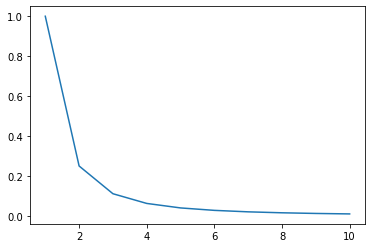

In [22]:
graph_eq('1/x**2', 1, 11)

Create a callable that we can pass to quad

In [23]:
def function(x):
    return 1/x**2

Improper integral

$$\int_1^{\infty} \frac{1}{x^2} dx$$

In [24]:
result = quad(function, 1, np.inf)

In [25]:
print(result)

(1.0, 1.1102230246251565e-14)


**Note**: if we try to do this all in one step, we get an error, which is why one must create a function for quad to call.

In [26]:
#result = quad(1/x**2, 1, np.inf)

---
## Interpolation

- A method for generating new data using a discrete set of known data points.

- https://docs.scipy.org/doc/scipy/reference/interpolate.html


---
#### A simple example

First things to do is create a **hypothetical set of known** x- and y-data points

In [27]:
## create a range of x values, starting at zero and giving 10 values
x_values = np.arange(0, 10)
print(x_values)

[0 1 2 3 4 5 6 7 8 9]


In [28]:
## create a corresponding range of y values
y_values = np.exp(-x_values/3.0)
print(y_values)

[1.         0.71653131 0.51341712 0.36787944 0.26359714 0.1888756
 0.13533528 0.09697197 0.06948345 0.04978707]


Now plot to visualize what the data looks like, highlighting the third data point in the series.

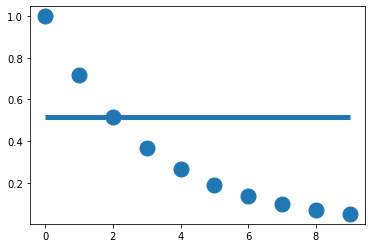

In [29]:
plt.plot()
plt.plot(x_values, y_values, 'o', markersize=15)
plt.hlines(0.51341712, 0, 9, colors='#1f77b4', linewidth=5)
plt.show()

#### Create an interprelated function from the existing data points

1-dimensional function
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

In [30]:
from scipy.interpolate import interp1d

In [31]:
type(x_values)

numpy.ndarray

In [32]:
## create a new function using the known data 
interp_function = interp1d(x_values, y_values)

First let's see if we can reproduce a **known** data point
- x = 2.0 should give a value of 0.51341712 (see above hypothetical data set)

In [33]:
interp_function(2.0)

array(0.51341712)

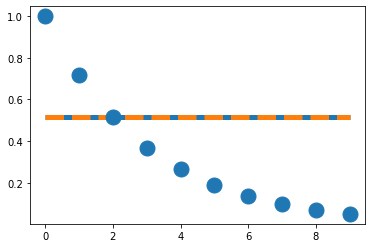

In [34]:
plt.plot()
plt.plot(x_values, y_values, 'o', markersize=15)
plt.hlines(0.51341712, 0, 9, colors='#1f77b4', linewidth=5)
plt.hlines(interp_function(2.0), 0, 9, colors='#ff7f0e', linestyles='dashed', linewidth=5)
plt.show()

We can also do this for lots of new x-values

In [35]:
## Create a new range of x values from 1.0 to 8.0 in 0.2 intervals
x_values_new = np.arange(1, 8, 0.2)
print(x_values_new)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8]


In [36]:
y_values_new = interp_function(x_values_new)   # use interpolation function returned by `interp1d`

In [37]:
print(y_values_new)

[0.71653131 0.67590847 0.63528563 0.5946628  0.55403996 0.51341712
 0.48430958 0.45520205 0.42609451 0.39698698 0.36787944 0.34702298
 0.32616652 0.30531006 0.2844536  0.26359714 0.24865283 0.23370852
 0.21876422 0.20381991 0.1888756  0.17816754 0.16745947 0.15675141
 0.14604335 0.13533528 0.12766262 0.11998996 0.11231729 0.10464463
 0.09697197 0.09147426 0.08597656 0.08047886 0.07498115]


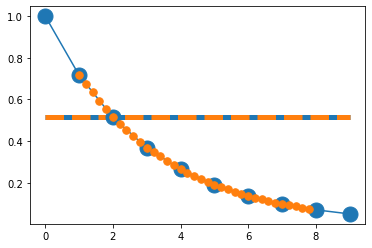

In [38]:
plt.plot()
plt.plot(x_values, y_values, '-o', x_values_new, y_values_new, '.', markersize=15)
plt.hlines(0.51341712, 0, 9, colors='#1f77b4', linewidth=5)
plt.hlines(interp_function(2.0), 0, 9, colors='#ff7f0e', linestyles='dashed', linewidth=5)
plt.show()

We see that the interpolated **new data** points (orange) fall nicely onto the known data.

#### A more complicated (and practical) example

#### Additional Information
- numpy's linspace: "Return evenly spaced numbers over a specified interval."
    - https://numpy.org/devdocs/reference/generated/numpy.linspace.html
    - the stepsize is created
    - the number of steps must be given

Versus
- numpy's arrange: "Return evenly spaced values within a given interval."
    - https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    - the stepsize is specified
    - the number of steps is created

In [39]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [40]:
x_values = np.linspace(0, 1, 10)
print(x_values)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


##### Create some noise that will allow us to better mimic what real data looks like

"Noise" refers to how much the real data varies from (hypothetical) ideal data. Understanding the noise in data is understanding the data's stability (e.g. reproducibility, predictable). Noise is often coming from unaccounted sources (and represent possible areas to learn from).

**Side Note**: The following **np.random.seed()** statement will allow us to reproduce the random number generation (e.g. allows for reproducibility in examples). This isn't necessary here, but it is nice to know about.

- np.random.random(n): https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html
    - create n random numbers that range from 0 to 1

In [41]:
np.random.seed(30)

np.random.random(10)

array([0.64414354, 0.38074849, 0.66304791, 0.16365073, 0.96260781,
       0.34666184, 0.99175099, 0.2350579 , 0.58569427, 0.4066901 ])

In [42]:
## create some noise
noise = (np.random.random(10)**2 - 1) * 2e-1
print(noise)

[-0.19628804 -0.14078314 -0.14629865 -0.08238665 -0.02558478 -0.19839066
 -0.19233472 -0.00231578 -0.18893803 -0.1885771 ]


Now generate some data (i.e. for the y-axis) that is coupled to the x-axis data.
1. ideal y data, versus
2. ideal y data with noise (we will call this **known**, suggesting that it might be **experimentally known**)

In [43]:
## 1. ideal data
y_values_ideal = np.sin(2 * np.pi * x_values)
y_values_ideal

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [44]:
## 2. ideal data with noise (i.e. simulated real data)
y_values_sim = np.sin(2 * np.pi * x_values) + noise
y_values_sim

array([-0.19628804,  0.50200447,  0.8385091 ,  0.78363875,  0.31643536,
       -0.5404108 , -1.05836013, -0.98712354, -0.83172564, -0.1885771 ])

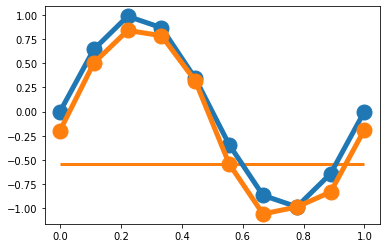

In [45]:
## Plot the "idea" (blue) and "simulated real" (orange) data
plt.plot()
plt.plot(x_values, y_values_ideal, '-o', color='#1f77b4', markersize=15, linewidth=5) # blue
plt.plot(x_values, y_values_sim, '-o', color='#ff7f0e', markersize=15, linewidth=5) # orange
plt.hlines(y_values_sim[5], 0, 1, colors='#ff7f0e', linewidth=3) # highlight the 6th point
plt.show()

Create a **new function** that is an **interpolation** of the existing (i.e. known) data points

In [46]:
interp_function = interp1d(x_values, y_values_sim)

First let's see if we can reproduce an "known" point

- We want to reproduce the sixth data point: x_value[5]
- interp_function(x_value[5]) should give y_value[5] of the original function

In [47]:
## idea+noise y value at the 6th x value point
y_values_sim[5]

-0.540410803949021

In [48]:
## interpolated y value at the 6th x value point
interp_function(x_values[5])

array(-0.5404108)

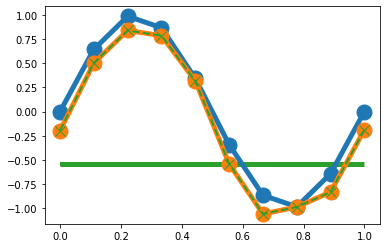

In [49]:
plt.plot()
## plot what we already know
plt.plot(x_values, y_values_ideal, '-o', color='#1f77b4', markersize=15, linewidth=5) # blue
plt.plot(x_values, y_values_sim, '-o', color='#ff7f0e', markersize=15, linewidth=5) # orange
plt.hlines(y_values_sim[5], 0, 1, colors='#2ca02c', linewidth=5) # green

## plot the interpolated curve
plt.plot(x_values, interp_function(x_values), '--x', color='#2ca02c', markersize=10, linewidth=2)
plt.hlines(interp_function(x_values[5]), 0, 1, colors='#2ca02c', linestyles='dashed', linewidth=4)

plt.show()

In [50]:
## quantify the difference between the interpolated and true value for the highlighted point
interp_function(x_values[5]) - y_values_sim[5]

0.0

**Percent Relative Error** is often calculated in the natural sciences, whose formuala is the following:

Percentage Relative Error = $\frac{\text{estimated}-\text{actual}}{\text{actual}}*100$

In [51]:
## interpolated versus ideal+noise (e.g. experimental values that includes some noise)
((interp_function(x_values[5]) - y_values_sim[5]) / y_values_sim[5])*100

-0.0

In [52]:
## interpolated versus ideal (e.g. ideal from a theoretical model)
## Plus, this shows how the addition of noise to the ideal data impacts our "modeling building"
((interp_function(x_values[5]) - y_values_ideal[5]) / y_values_ideal[5])*100

58.005548648181936

---
## Curve Fitting and Optimization

Finding a numerical solution for maximizing or minimizing a function.

- optimize: https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

- curve_fit: https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html?highlight=curve_fit


**Example**: Raw data that follows a sine wave, but we don't know the amplitude or period that the data has

    - Goal: find the amplitude and period
    
Recall some basic math

$$y = Asin(Bx + C) + D$$

Where

A: amplitude

2π/B: period (with respect to radians - i.e. a full rotation is 2π radians)

C: phase shift

D: vertical shift

x: x-axis data

In [53]:
from scipy import optimize

In [54]:
## Create 50 equally spaced data points
x_values = np.linspace(-5, 5, num=50)
x_values

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [55]:
## Create some noise so that we can create more realistic data
noise = np.random.random(50)
noise

array([0.62909983, 0.73495258, 0.68834438, 0.03113075, 0.90251384,
       0.28643533, 0.55561256, 0.37642024, 0.02662436, 0.49414912,
       0.83471509, 0.36698733, 0.51538211, 0.47237913, 0.38615209,
       0.744137  , 0.33524208, 0.59543829, 0.31613338, 0.34625042,
       0.24483181, 0.69795016, 0.21208083, 0.26729317, 0.37389408,
       0.57308851, 0.91735808, 0.81897594, 0.16318089, 0.02415477,
       0.78465363, 0.26485738, 0.33936706, 0.81436959, 0.80745472,
       0.49356164, 0.84531244, 0.36518998, 0.0478309 , 0.26414579,
       0.46386716, 0.69335506, 0.31343675, 0.46253679, 0.81968765,
       0.68449103, 0.32403382, 0.576812  , 0.63264998, 0.59646167])

In [56]:
## Create our target data (i.e. simulated experimental data) that follows a sine wave by adding some noise
## Amplitude: 1.7, period: 2π/2.5, C=D=0

y_values = 1.7*np.sin(2.5 * x_values) + noise
y_values

array([ 0.74184706,  1.66171708,  2.19306972,  1.73054791,  2.36376381,
        1.13732272,  0.57940762, -0.43293788, -1.40973511, -1.20335619,
       -0.691564  , -0.59930657,  0.35519838,  1.15910601,  1.7448732 ,
        2.42877211,  1.9166973 ,  1.67090073,  0.61167171, -0.21341202,
       -1.02747962, -0.96293946, -1.41434133, -0.91039509, -0.05509097,
        1.00207356,  2.09504633,  2.44539809,  1.82407051,  1.2964662 ,
        1.34431607, -0.03068095, -0.73609538, -0.76708563, -0.87718038,
       -0.86515947,  0.15858556,  0.52537371,  1.0141248 ,  1.79042488,
        2.16137247,  2.12971454,  1.12279488,  0.43874173, -0.03119974,
       -0.77675894, -1.37538334, -0.92791333, -0.29411452,  0.48371444])

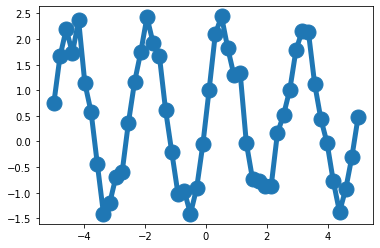

In [57]:
plt.plot(x_values, y_values, '-o', markersize=15, linewidth=5)
plt.show()

Setup our simple test function that we can solve for the amplitude and period (i.e. a test function with two variables only: a and b).

-Note: I'm not including any internal test (e.g. isinstance, assert) in order to keep the teaching aspects clear here.

In [58]:
def test_sine_func(x=None, a=None, b=None):
    return a * np.sin(b * x)

Use SciPy's optimize.curve_fit to find the solutions
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html?highlight=curve_fit

What is needed:
1. a function
2. x and y target data values, and
3. and initial guesses (i.e. p0 below) - we need two for a and b

What is returned:
1. **solution values**
2. covariance: estimate of how much 2 variables vary (i.e. change) together (e.g. smoking and lifespan), or
    - in other words, how correlated they are to one another (i.e. the off diagonal of the resulting matrix, which includes the concept of positive or negative correlation)
    - the square of the diagonals of the covariance matrix gives the standard deviation for each of the solution values

In [59]:
## use p0=[2.0, 2.0] as the initial guess
solution, solution_covariance = optimize.curve_fit(test_sine_func, x_values, y_values, p0=[2.0, 2.0])

In [60]:
## The ideal values are: amplitude (a) = 1.7, period (b) = 2.5 with C=D=0
##   But remember, we added noise, so our solution will be close to these values
solution

array([1.67894587, 2.49000902])

In [61]:
solution_covariance

array([[0.01264216, 0.00016643],
       [0.00016643, 0.00049069]])

In [62]:
std_dev = np.sqrt(np.diag(solution_covariance))
std_dev

array([0.11243734, 0.02215159])

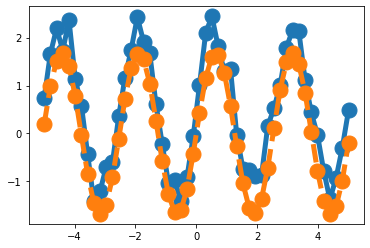

In [63]:
plt.plot()

plt.plot(x_values, y_values, '-o', markersize=15, linewidth=5) # blue; simulated experimental date
plt.plot(x_values, test_sine_func(x_values, solution[0], solution[1]),
         '--o', markersize=15, linewidth=5) # orange; curve fit

plt.show()

Note: The **solution** will **depend** on the **intial guess**. There are several possible "local" solutions that can can be found.

We **artifically knew** the solution before hand, to be near **a=1.7 and b=2.5**...so p0=[2.0, 2.0] was a good starting point.

Exploration is needed when we don't know the approximate (or exact) solution before. Visualization of the results helps you interpret them (i.e. build your understanding of what the results are).

Demonstrate and plot the results using:
- p0=[1.0, 1.0] --> should give a different result
- p0=[3.0, 3.0] --> should give you the "correct" solution
- p0=[5.0, 5.0] --> should give a different result

---
## Optimization
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

##### scipy.optimize.minimize() and its output **type**

**Input**
func: a function that will be minimized
x0: an initial guess


**Output**
The output is a compound object containing lot of information regarding the convergence (see example below for what it looks like).


##### Solvers
- Nelder-Mead
- Powell
- CG
- BFGS
- Newton-CG
- L-BFGS-B
- TNC
- COBYLA
- SLSQP
- trust-constr
- dogleg
- trust-ncg
- trust-exact
- trust-krylov


- **Default solver**: quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (**BFGS**)
    - https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs
- More background on minimization: http://scipy-lectures.org/advanced/mathematical_optimization

---
**Example**: Find the minimum of a 1D function (i.e. a scalar function; a function that return a single value from input values)

In [64]:
def scalar_func(x=None):
    return x**2 + 25*np.sin(x)

$$ x^2 + 25sin(x) $$

In [65]:
x_values = np.arange(-10, 10, 0.1)

y_values = scalar_func(x_values)

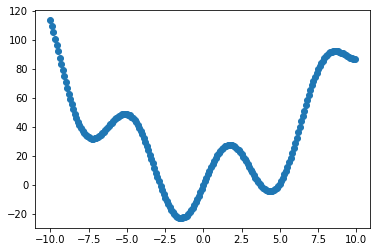

In [66]:
## View what the x- and y- data look like

plt.plot()
plt.plot(x_values, y_values, 'o')
plt.show()

Notice the three minima that are present (i.e. one global, and two local)


Let's start with an inital guess near the global minimum (i.e x0=0.0).

In [67]:
result_global = optimize.minimize(scalar_func, x0=0.0, method="BFGS")

In [68]:
result_global

      fun: -22.71556099678873
 hess_inv: array([[0.0372705]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-1.45419657])

In [69]:
result_global.x

array([-1.45419657])

Now let's set an initial guess closer to one of the local minimum (i.e. x0=3.0)

In [70]:
result_local = optimize.minimize(scalar_func, x0=3.0, method="BFGS")

In [71]:
result_local

      fun: -4.454335797238624
 hess_inv: array([[0.03931567]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.35640541])

#### Overcoming the dependency on the initial guess
- fminbound: a minimization within boundaries
- brute: minimize a function over a given range through lots of sampling
- differential_evolution: global minimum a multivariate function
- shgo: global minimum using SHG optimization
- dual_annealing: global minimum using dual annealing

**fminbound** https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fminbound.html

In [72]:
optimize.fminbound(scalar_func, -10, 10)

-1.4541952455722909

**brute force** https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute

In [73]:
optimize.brute(scalar_func, ((-10,10),))

array([-1.45420436])

**basin hopping** https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html
- combines global stepping with local minimization
- rugged, funnel-like surfaces (e.g. molecular potential energy surfaces)
- requires: a function and an initial guess (so not a "perfect" method)
    
- sensitive to stepsize
    - stepsize=0.5 (i.e. default value) results in a local minmium
    - stepsize=2.5 finds the global mimimum

In [74]:
## recall that x0=3.0 gives local minimum using optimize.minimize
optimize.basinhopping(scalar_func, x0=3.0, stepsize=0.5)

                        fun: -4.454335797238624
 lowest_optimization_result:       fun: -4.454335797238624
 hess_inv: array([[0.03931567]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.35640541])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1650
                        nit: 100
                       njev: 550
                          x: array([4.35640541])

## Finding the **Roots**

- Roots: points where f(x) = 0
    - For example, the values of x that satisfies the equation $ x^2 + 25sin(x) = 0 $
- Finding the roots of a function provides you a solution to that function, which can be useful depending on the problem at hand.

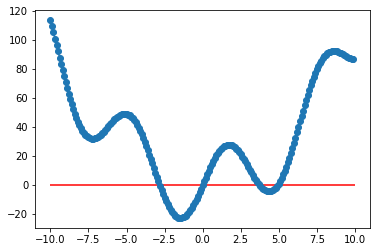

In [75]:
plt.plot()
plt.plot(x_values, scalar_func(x_values), '-o')
plt.hlines(0, -10, 10, colors='red')
plt.show()

### There should be four roots (ca. -3.0, 0.0, 4.0 and 5.0)

In [76]:
root1 = optimize.root(scalar_func, x0=-4)
root1

    fjac: array([[-1.]])
     fun: array([-4.4408921e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.60387817e-09])
       r: array([29.34126755])
  status: 1
 success: True
       x: array([-2.81828105])

In [77]:
root2 = optimize.root(scalar_func, x0=1)
root2

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([6.76097707e-29])
       r: array([-25.])
  status: 1
 success: True
       x: array([0.])

In [78]:
root3 = optimize.root(scalar_func, x0=4)
root3

    fjac: array([[-1.]])
     fun: array([-2.04281037e-13])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.54493936e-08])
       r: array([13.29152894])
  status: 1
 success: True
       x: array([3.7327774])

In [79]:
root4 = optimize.root(scalar_func, x0=7)
root4

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.99635905e-11])
       r: array([-15.43885235])
  status: 1
 success: True
       x: array([4.9368738])

In [80]:
root4.x

array([4.9368738])

In [81]:
x=root4.x[0]
x**2 + 25*np.sin(x)

0.0